# *Study Stats*

In [1]:
%%html
<style>
table {float:left}
</style>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

## 정규 분포 그리기

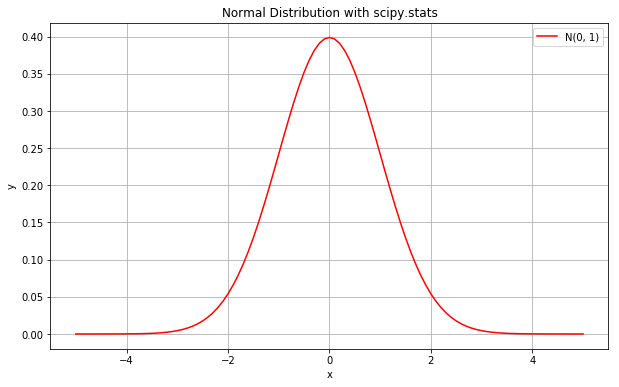

In [2]:
x = np.linspace(-5, 5, 101) # x 정의
y1 = stats.norm(0, 1).pdf(x) 
plt.figure(figsize=(10, 6)) # 플롯 사이즈 지정 
plt.plot(x, y1, color="red") # 선을 빨강색으로 지정하여 plot 작성 
plt.xlabel("x") # x축 레이블 지정 
plt.ylabel("y") # y축 레이블 지정 
plt.grid() # 플롯에 격자 보이기 
plt.title("Normal Distribution with scipy.stats") # 타이틀 표시 
plt.legend(["N(0, 1)"]) # 범례 표시 
plt.show() # 플롯 보이기

## $\chi^2$ 분포 그리기

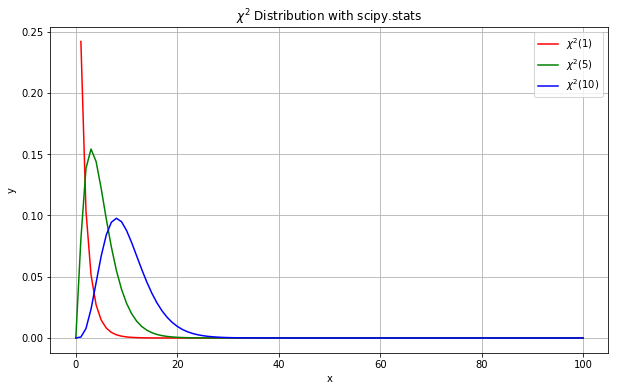

In [5]:
x = np.linspace(0, 100, 101) # x 정의
y1 = stats.chi2(1).pdf(x) 
y5 = stats.chi2(5).pdf(x) 
y10 = stats.chi2(10).pdf(x) 
plt.figure(figsize=(10, 6)) # 플롯 사이즈 지정 
plt.plot(x, y1, color="red")
plt.plot(x, y5, color="green")
plt.plot(x, y10, color="blue")
plt.xlabel("x") # x축 레이블 지정 
plt.ylabel("y") # y축 레이블 지정 
plt.grid() # 플롯에 격자 보이기 
plt.title("$\chi^2$ Distribution with scipy.stats") # 타이틀 표시 
plt.legend(["$\chi^2(1)$","$\chi^2(5)$","$\chi^2(10)$"]) # 범례 표시 
plt.show() # 플롯 보이기

## 웹 사이트 개선을 위한 A/B 실험 (비율 차이 검정)

버튼 색깔|트래픽 수|구매 횟수|구매율
---|---|---|---
파랑(대조군)|1,000|100|10.0%
빨강(실험군)|100|12|12.0%
합계|1,100|112|10.2%

$z = \frac {\hat{P_a}-\hat{P_b}} {\sqrt {\hat{P}(1-\hat{P}) (\frac {1}{n_1} + \frac {1}{n_2}) } }$

In [14]:
z = (0.12-0.1)/np.sqrt(0.102*(1-0.102)*(1/1000+1/100))
z

0.630079571157626

In [19]:
# p-value 구하기
1-stats.norm.cdf(z,loc=0,scale=1)

0.26432126241846376

In [17]:
# 임께치 구하기
stats.norm.ppf(0.975,loc=0,scale=1)

1.959963984540054

## 베이지안 통계

### 곱사상과 조건부 확률 그리고 승법정리

P(A+B) = P(A) * P(B|A) = P(B) * P(A|B)

### 승법정리로부터 베이즈 정리 도출

P(A|B) = P(B|A) * P(A) / P(B)

### 베이즈 정리의 변형

P(H|D) = P(D|H) * P(H) / P(D)  
H : 가정(원인), D : 데이터(결과)

 ### 예) 검사 결과 양성일 때 실제 병에 걸렸을 확률

검사 결과|실제 양성|실제 음성
---|---|---
양성|민감도 98%|위양성율 5%
\*전체(사전확률)|0.03|0.97

전체적인 (실제) 양성 확률 : 3%

$P(H|D) = P(D|H) * P(H) / P(D) = P(D|H) * P(H) / (P(D|H) * P(H) + P(D|\hat{H}) * P(\hat{H}))$

In [7]:
0.98*0.03 / (0.98*0.03 + 0.05*(1-0.03))

0.3774069319640565

### 예) 항아리 제조사 맞추기

구슬 색깔|제조사 A|제조사 B
---|---|---
빨강|3|6
흰색|7|4

1) 첫 번째 빨강 구슬이 나왔을 때, 항아리 제조사가 A일 확률은?

P(H=A|D=빨강) = P(D=빨강|H=A) * P(H=A) / P(D=빨강)  
\* P(H=A) = 0.5 (이유 불충분의 원칙에 따라 0.5로 가정)

In [9]:
Pa = 0.3*0.5 / (0.3*0.5 + 0.6*0.5)
Pa

0.33333333333333337

2) 두 번째 빨강 구슬이 나왔을 때, 항아리 제조사가 A일 확률은?

In [10]:
0.3*Pa / (0.3*Pa + 0.6*(1-Pa))

0.2

\* 두 번째 계산에서는 첫 번째 계산에서 나온 사후 확률을 사전 확율로 사용하였다. 이 것을 베이즈 갱신이라 한다.

### 예) 나이브 베이즈 필터로 스팸 메일 알아내기

검출 단어|P(D\|H=스팸)|P(D\|H=~스팸)
---|---|---
D1(아이돌)|0.6|0.1
D2(무료)|0.5|0.3
D3(통계)|0.01|0.4
D4(경제)|0.05|0.5
\*사전확률|0.7|0.3

\* 수신 메일 중 스팸 메일과 보통 메일의 비율은 7 : 3 이다.

1) 첫 번째 D1(아이돌) 단어가 검출되었을 때, 메일이 스팸일 확률은?

Ps = P(D1|H) * P (H) / P(D1)  
Pg = P(D1|H') * P(H') / P(D1)

In [14]:
Ps = 0.6 * 0.7
Pg = 0.1 * 0.3
Pd1 = Ps + Pg
Ps, Pg, Pd1

(0.42, 0.03, 0.44999999999999996)

2) 두 번째 D4(결제) 단어가 검출되었을 때, 메일이 스팸일 확률은?

Ps = P(D4|H) * P (H) / P(D4)  
Pg = P(D4|H') * P(H') / P(D4)

In [12]:
Ps = 0.05 * Ps
Pg = 0.5 * Pg
Ps, Pg

(0.021, 0.015)